# Introduction

This notebook does some EDA on the dataset.

# Setup

Navigate to the project's root folder:

In [1]:
%cd ..

/tf


# Libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import hdbscan

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

# Data

In [4]:
data_file = "./data/FraudDetection_Dataset.xlsx"

df_unknown = pd.read_excel(data_file,
                           sheet_name="Data")

df_unknown['Marker'] = "Unknown"


df_fraud = pd.read_excel(data_file,
                         sheet_name="KnownFraud")

df_test = pd.read_excel(data_file,
                        sheet_name="Test")

# EDA

## Summary Statistics

In [5]:
df_unknown.describe()

,CustomerID,Behavior1,Behavior2,Behavior3,Behavior4,Behavior5,Behavior6,Behavior7,Behavior8,Behavior9,Behavior10,Behavior11
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,4.939400,-9.637268,13.814707,-10.464489,-7.956229,10.199504,-6.019408,7.969829,-6.253182,2.324513,8.473723
std,288.819436,7.812549,7.297875,7.653368,9.180867,8.082940,9.469136,7.462519,9.340749,5.446001,8.417604,7.110142
min,1.000000,-17.488978,-38.593613,-9.913776,-35.968341,-35.351822,-19.691088,-32.280955,-23.218312,-22.039903,-23.459247,-20.151703
25%,250.750000,-0.316875,-14.748531,8.574329,-16.857135,-13.441359,3.845608,-10.927054,1.903339,-10.088911,-3.480037,3.954336
50%,500.500000,5.307967,-9.713506,13.683700,-10.443133,-8.031732,10.125638,-6.140154,8.256812,-6.277626,2.549715,8.478900
75%,750.250000,9.988519,-4.861675,18.648459,-4.187347,-2.511060,16.528072,-0.396653,14.180604,-2.540369,7.779696,13.244609
max,1000.000000,28.384866,13.689702,43.322411,16.082439,15.592370,47.131732,25.473844,41.978198,12.090257,26.166271,36.544551


In [6]:
df_fraud.describe()

,CustomerID,Behavior1,Behavior2,Behavior3,Behavior4,Behavior5,Behavior6,Behavior7,Behavior8,Behavior9,Behavior10,Behavior11
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1004.000000,6.195739,-9.208712,15.725841,-12.431071,-3.158387,18.229543,-9.922463,20.338490,-4.262423,0.441022,3.719770
std,2.160247,18.755071,14.187411,11.093692,11.848823,7.223695,21.800404,5.659620,9.775000,13.032445,20.219063,10.065662
min,1001.000000,-19.772252,-31.671866,-1.620125,-27.643971,-15.564298,-12.313000,-19.860870,6.395132,-21.869114,-25.928200,-14.351700
25%,1002.500000,-6.366335,-12.500044,9.718767,-21.969020,-7.452924,4.271064,-12.488759,14.594477,-13.825904,-10.913245,0.189738
50%,1004.000000,12.953176,-11.379227,17.543187,-12.700243,0.537667,18.614530,-8.376931,20.664013,-5.536944,-6.113620,4.453282
75%,1005.500000,17.417859,-6.046986,21.826417,-2.173357,2.177348,29.879850,-6.401018,24.841496,7.934775,10.793136,8.964974
max,1007.000000,28.086200,15.684168,31.067457,1.611472,3.469073,53.003440,-3.439889,36.438338,9.351355,35.369190,17.627380


In [7]:
df_test.describe()

,CustomerID,Behavior1,Behavior2,Behavior3,Behavior4,Behavior5,Behavior6,Behavior7,Behavior8,Behavior9,Behavior10,Behavior11,Marker
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,0.0
mean,2047.000000,4.394968,-9.410672,13.879450,-9.646173,-8.177733,12.806664,-5.323023,6.353778,-6.041382,2.157220,7.747681,NaN
std,26.990739,8.866721,6.817324,7.941536,8.748709,7.710620,8.987972,7.576307,8.185638,5.395111,8.160253,6.487505,NaN
min,2001.000000,-20.522425,-28.697342,-9.314258,-28.990815,-22.508399,-8.338388,-23.246868,-15.290246,-21.132078,-17.233364,-11.485781,NaN
25%,2024.000000,-0.928511,-14.191963,9.390198,-17.034108,-14.041487,6.970555,-10.300471,0.168293,-10.145633,-1.711708,2.890973,NaN
50%,2047.000000,4.065777,-9.029982,14.209103,-9.112089,-9.115423,13.931776,-6.425532,7.165935,-6.026065,1.596732,9.393963,NaN
75%,2070.000000,10.108061,-4.486395,19.257656,-3.139122,-2.026538,18.019424,-1.181354,11.912714,-2.721270,6.770209,11.644504,NaN
max,2093.000000,26.904309,5.109982,35.802845,10.646447,14.097630,32.706367,24.356603,27.776577,7.003553,29.927104,21.949361,NaN


## Feature distribution

Left is `Unknown`, right is `KnownFraud`:

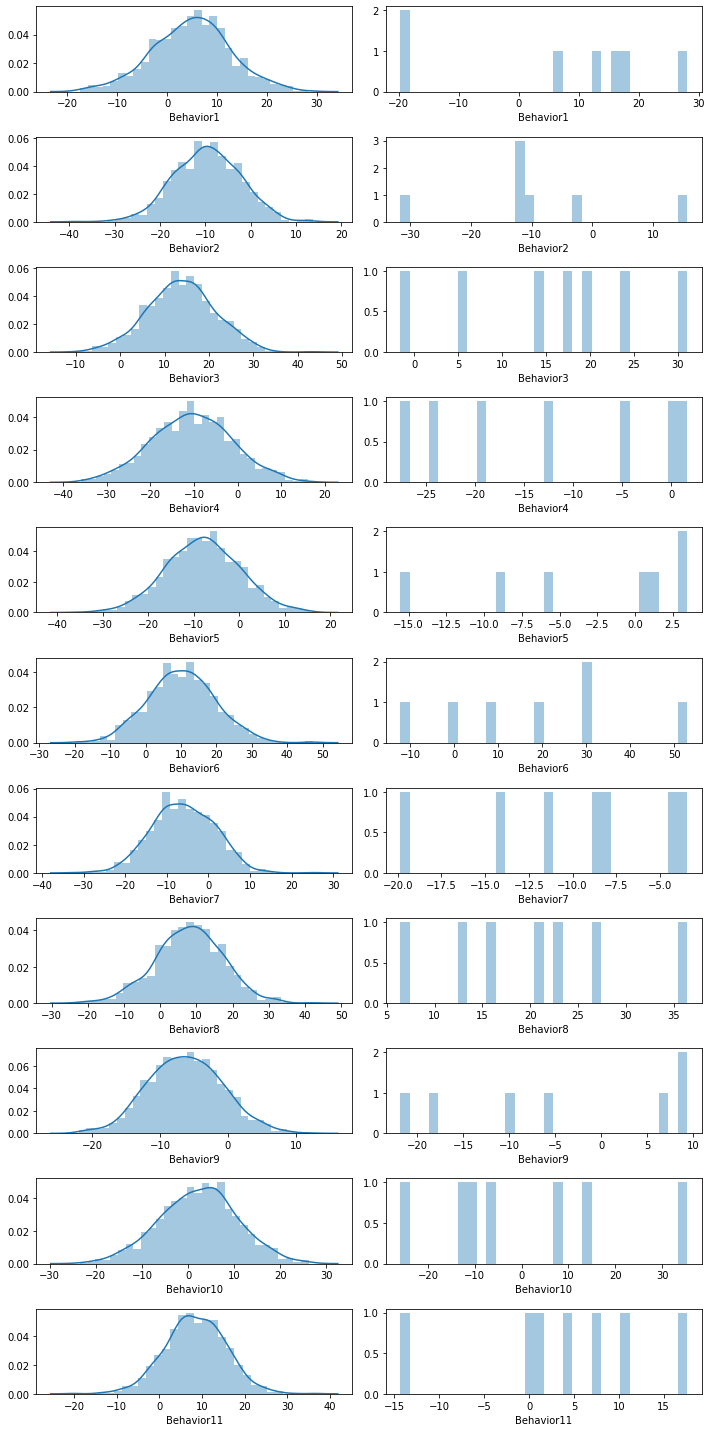

In [8]:
feature_cols = [f"Behavior{i}" for i in range(1, 12)]

n_rows = 11
n_cols = 2

f, axes = plt.subplots(n_rows, n_cols, figsize=(10, 20))

for row in range(n_rows):
    feature_col = feature_cols[row]
    sns.distplot(df_unknown[feature_col], ax=axes[row, 0], kde=True, bins=30)
    sns.distplot(df_fraud[feature_col], ax=axes[row, 1], kde=False, bins=30)

plt.tight_layout()


## Rescale Features

Rescale the features to have mean 0 and standard deviation 1:

In [9]:
standard_scaler = StandardScaler()
standard_scaler.fit(df_unknown[feature_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
features_std = standard_scaler.transform(df_unknown[feature_cols])
df_features_std = pd.DataFrame.from_records(features_std, columns=feature_cols)

feature_means = df_features_std.mean(axis=0)
feature_stds = df_features_std.std(axis=0)

assert np.allclose(feature_means, 0)
assert np.allclose(feature_stds, 1, atol=1/1000)

Plot the rescaled features:

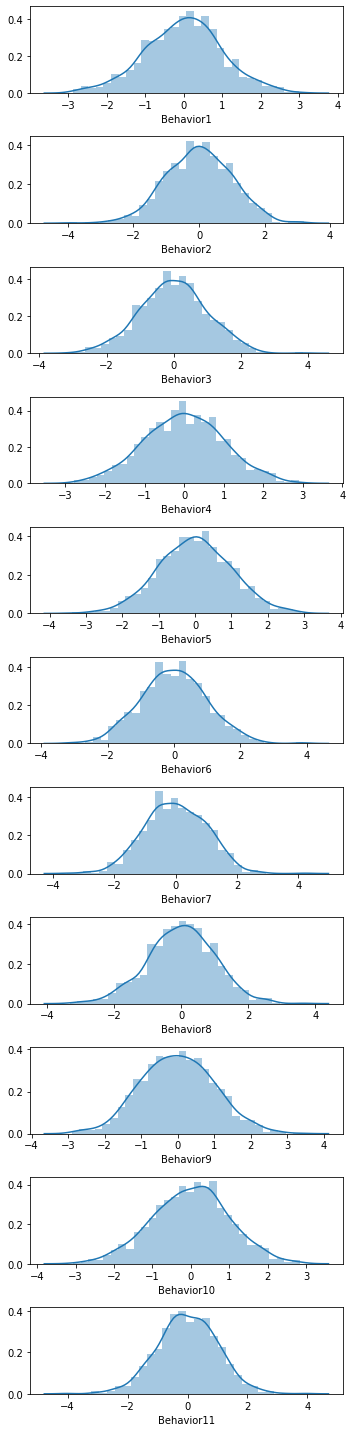

In [11]:
n_rows = 11
n_cols = 1

f, axes = plt.subplots(n_rows, n_cols, figsize=(5, 20))

for row in range(n_rows):
    feature_col = feature_cols[row]
    sns.distplot(df_features_std[feature_col], ax=axes[row], kde=True, bins=30)
    
plt.tight_layout()

# Number of customer groups

Visualize `df_features_std` in 2-D using PCA:

In [12]:
pca = PCA(n_components=2)
pca = pca.fit(df_features_std)

print(f"Total explained variance: { pca.explained_variance_ratio_.sum():.2f}")

Total explained variance: 0.23


In [13]:
df_features_2d = pca.transform(df_features_std)

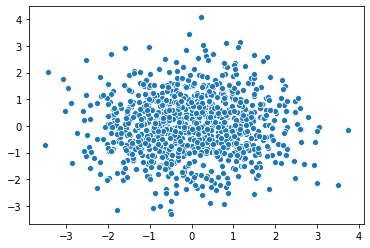

In [14]:
x, y = df_features_2d.T

sns.scatterplot(x, y)

Visualize `df_features_std` in 2-D using T-SNE:

In [15]:
%%time
tsne = TSNE(n_components=2,
            perplexity=200,
            verbose=1,
            n_iter=3000,
            learning_rate=500)
df_features_2d = tsne.fit_transform(df_features_std)

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.642498
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.408310
[t-SNE] KL divergence after 1200 iterations: 1.077470
CPU times: user 31.1 s, sys: 142 ms, total: 31.2 s
Wall time: 32.7 s


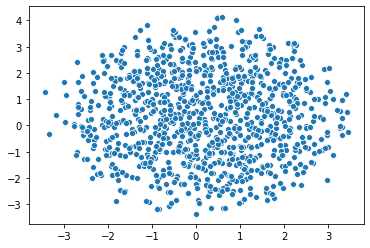

In [16]:
x, y = df_features_2d.T

sns.scatterplot(x, y)

Cluster the standardized features using hdbscan:

In [17]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
clusterer.fit(df_features_std)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=2, min_samples=None, p=None,
        prediction_data=False)

In [18]:
n_clusters = len(set(clusterer.labels_)) - 1
print(f"Found {n_clusters} groups of customers.")

Found 3 groups of customers.


Plot the clusters in 2D:

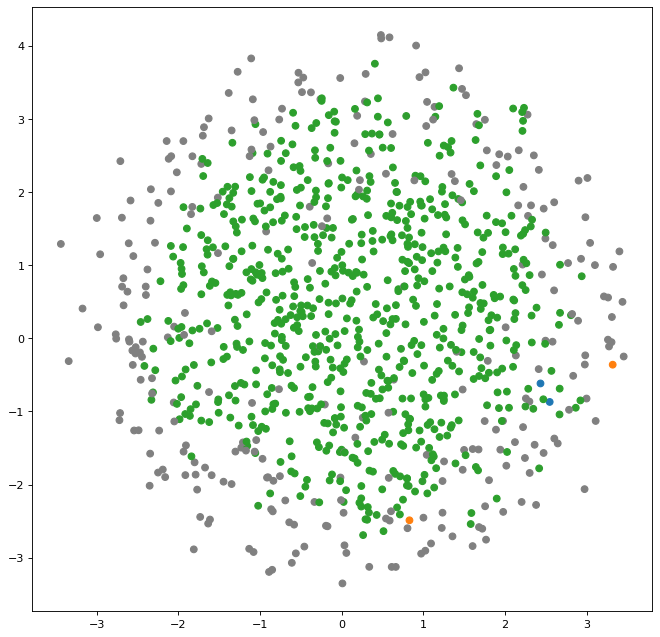

In [19]:
palette = sns.color_palette(n_colors=n_clusters)
cluster_colors = [sns.desaturate(palette[col], sat) 
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in 
                  zip(clusterer.labels_, clusterer.probabilities_)]

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(x, y, c=cluster_colors)

View some stats about the groups:

In [20]:
cluster_groups = range(n_clusters)

In [21]:
df_unknown['cluster'] = clusterer.labels_

View average values for each of the group's Behavior values:

In [22]:
sample_clusters = df_unknown[feature_cols + ['cluster']] \
    .query('cluster in @cluster_groups') \
    .groupby('cluster') \
    .mean() \
    .reset_index()

sample_clusters['cluster'] = sample_clusters['cluster'].map(lambda x: "group_" + str(x))

sample_clusters.head()

,cluster,Behavior1,Behavior2,Behavior3,Behavior4,Behavior5,Behavior6,Behavior7,Behavior8,Behavior9,Behavior10,Behavior11
0,group_0,2.937285,-14.339380,3.288213,-20.246535,-16.541358,17.242422,-9.780942,-9.959619,-11.144143,9.529800,6.089721
1,group_1,8.720446,-11.628090,12.886279,-10.188614,-22.438735,-4.907703,-17.660358,6.775778,-3.954747,-5.794578,-4.911374
2,group_2,4.964413,-9.192452,13.863590,-11.005813,-8.088397,10.296568,-6.148430,7.967503,-6.322893,2.196718,8.509015


Count observations in each cluster:

In [23]:
df_unknown[feature_cols + ['cluster']] \
    .query('cluster in @cluster_groups') \
    .groupby('cluster') \
    .size() \
    .to_frame('number of observations')

,number of observations
cluster,
0,2
1,2
2,717


Line plot to view the Behavior  values accross all the clusters:

In [24]:
sample_clusters_long = pd.melt(sample_clusters, 
                               id_vars=['cluster'], 
                               value_vars=feature_cols, 
                               var_name='Behavior', 
                               value_name='value')

sample_clusters_long['Behavior'] = sample_clusters_long['Behavior'].str.extract(r"Behavior(\d{1,2})").astype('int')

sample_clusters_long.head()

,cluster,Behavior,value
0,group_0,1,2.937285
1,group_1,1,8.720446
2,group_2,1,4.964413
3,group_0,2,-14.339380
4,group_1,2,-11.628090


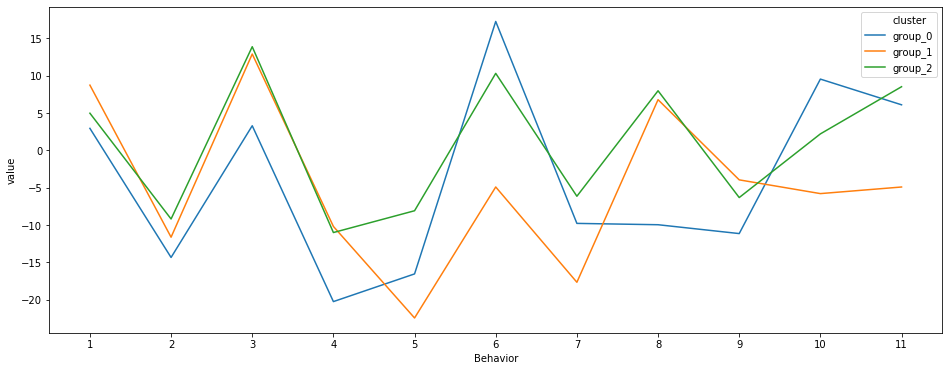

In [25]:
plt.figure(figsize=(16, 6))


ax = sns.lineplot('Behavior', 'value', hue="cluster", data=sample_clusters_long)
ax.set(xticks=range(1, 12))
plt.show()

**Conclusion**

There are 3 groups of customers, call them group 0, 1 and 2.

Let group 2 be the baseline group since it has the most number of customers.

The characteristic that distinguishes customers in group 0 and 2 is that customers in group 0 have low values of Behavior8 relative to group 2, on average.

The characteristics that distinguishes customers in group 1 and 2 is that customers in group 1 have low values in Behavior6 and Behavior11 relative to group 2, on average.

